Source: http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn import datasets, linear_model

Generate a model dataset:

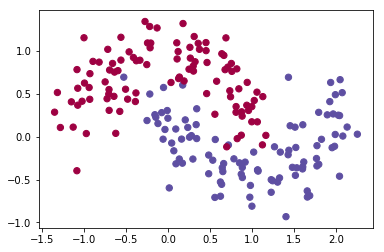

In [2]:
np.random.seed(0)
X, y = datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

Find the boundary

In [12]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()

First approach: fit a straight line

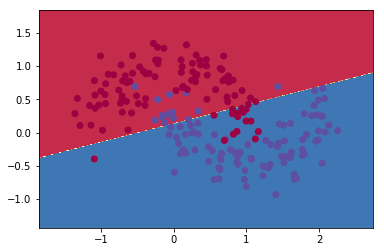

In [9]:
clf = linear_model.LogisticRegressionCV()
clf.fit(X, y)
# Plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x))

# Neural network:
Network parameters

In [5]:
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer size - x,y
nn_output_dim = 2 # output layer size

In [6]:
# Gradient descent parameters
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

COST FUNCTION

 Helper function to evaluate the total loss on the complete dataset with the given network

In [10]:
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)

    return 1./num_examples * data_loss

FEEDFORWARD

 Helper function to predict an output (0 or 1)

In [14]:
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

 This function learns parameters for the neural network and returns the model.
 - nn_hdim: Number of nodes in the hidden layer
 - num_passes: Number of passes through the training data for gradient descent
 - print_loss: If True, print the loss every 1000 iterations

In [8]:
def build_model(nn_hdim, num_passes=20000, print_loss=False):
     
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
 
    # This is what we return at the end
    model = {}
     
    # Gradient descent. For each batch...
    for i in range(0, num_passes):
 
        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        #softmax:
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
 
        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
 
        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
         
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
         
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if(print_loss and i% 1000 == 0):
            print('Loss after iteration' + str(i) + ': ' + str(calculate_loss(model)))
     
    return model

Train a NN with a 3 node hidden layer

In [17]:
model = build_model(3, print_loss=True)

Loss after iteration0: 0.432154127896
Loss after iteration1000: 0.0653595926631
Loss after iteration2000: 0.0679082699099
Loss after iteration3000: 0.067711318215
Loss after iteration4000: 0.0676138501052
Loss after iteration5000: 0.0675602680986
Loss after iteration6000: 0.067526397552
Loss after iteration7000: 0.0675028024489
Loss after iteration8000: 0.0674852566169
Loss after iteration9000: 0.0674716167831
Loss after iteration10000: 0.0674606759788
Loss after iteration11000: 0.0674516959115
Loss after iteration12000: 0.0674441952846
Loss after iteration13000: 0.0674378443419
Loss after iteration14000: 0.0674324078876
Loss after iteration15000: 0.0674277124347
Loss after iteration16000: 0.0674236262847
Loss after iteration17000: 0.0674200469604
Loss after iteration18000: 0.0674168930215
Loss after iteration19000: 0.067414098589


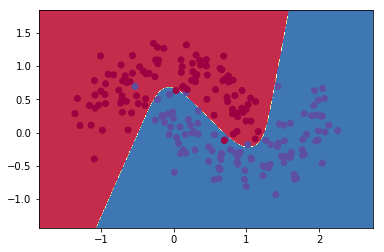

In [16]:
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))